# EDA on Haberman cancer survival Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\kingjames\Downloads\haberman.csv")
data


,aGe,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [3]:
data.shape

(306, 4)

In [4]:
data['status'].value_counts()
#it shows that 81 patients are died within 5 years after operation 
# and 225 patients survived after operation 


1    225
2     81
Name: status, dtype: int64

In [5]:
print("chances of surviving after operation =",(225/306)*100)
print("chances of patient dying after opration = =",(81/306)*100)


chances of surviving after operation = 73.52941176470588
chances of patient dying after opration = = 26.47058823529412


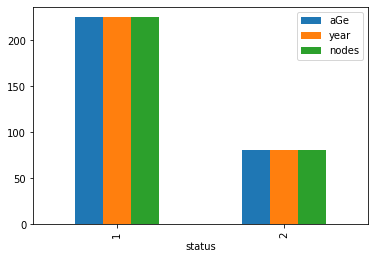

In [6]:
data.groupby("status").count().plot.bar()

In [7]:
data.info()
#so there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
aGe       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


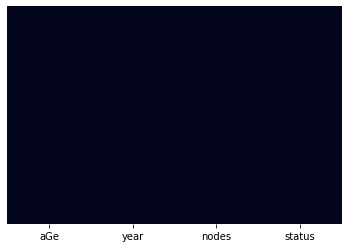

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
# no null values we can see in heatmap

In [9]:
data.describe()

,aGe,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 2D Scatter plot

<function matplotlib.pyplot.show(*args, **kw)>

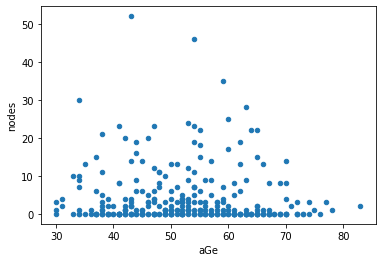

In [10]:
data.plot(kind="scatter", x="aGe" , y="nodes")
plt.show
#this doesnt make any sense 

C:\Users\kingjames\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


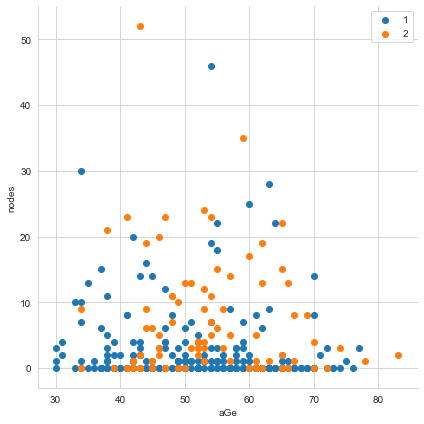

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", size=6).map(plt.scatter, "aGe","nodes")
plt.legend()
plt.show()
#here also we cant find any conclusion as it doesnt separate the status
#dosnt make sense so i will use pairplot

Observations:
    1] it doesnt make any sense as it is not linearly separable
    2]still we can see that most of patient who have died are in betwwen age of 40 to 70

# Pairplot

C:\Users\kingjames\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kingjames\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


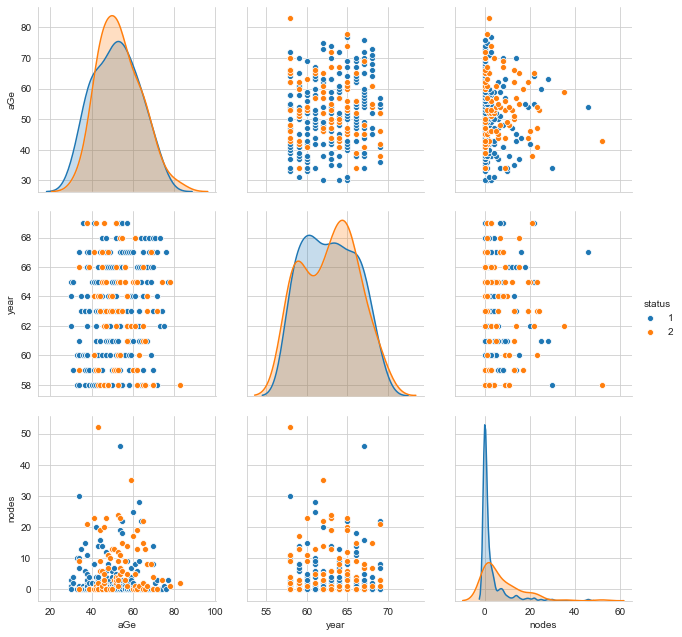

In [95]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="status", vars=['aGe','year' ,'nodes'],size=3)
plt.show()

observation:
        1] here also it any pairplot doesnt separating status of patient linearly still we can see 
           that NODES vs YEAR makes a lot of sense we gain more information as compaired to other 
           pairplot

# PDF (probability density function)

C:\Users\kingjames\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kingjames\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


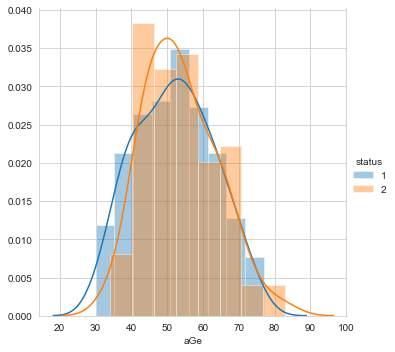

In [96]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "aGe").add_legend()
plt.show()

Observation:
         1]Till age 50 the chances of dying increases after that chances or probability of dying decreases

C:\Users\kingjames\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kingjames\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


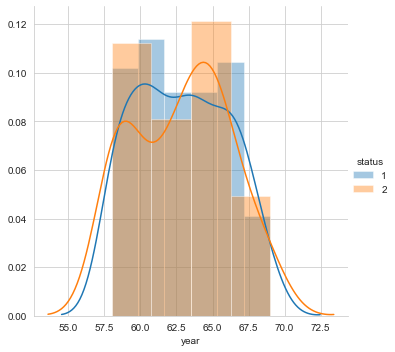

In [98]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "year").add_legend()
plt.show()

C:\Users\kingjames\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kingjames\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


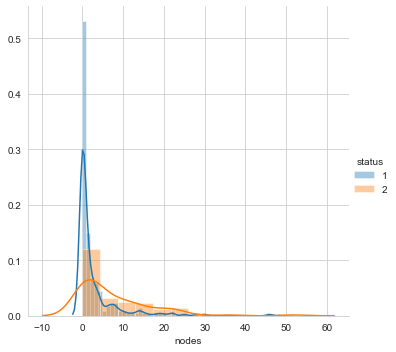

In [97]:
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "nodes").add_legend()
plt.show()

Observation:
          1]between nodes 0 to 0.5 there is more probability that patient is going to survived.  

# CDF (Cumulative distribution function)

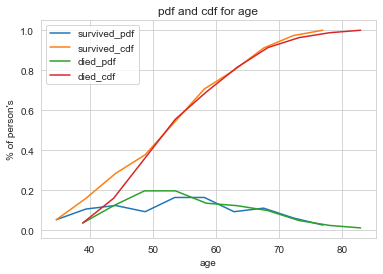

In [43]:
survived=data.loc[data['status']==1]
not_survived=data.loc[data['status']==2]
label = ["survived_pdf", "survived_cdf", "died_pdf", "died_cdf"]
counts , bin_edges= np.histogram(survived['aGe'] , bins=10 , density= True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(not_survived["aGe"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()


Observations:
        1]Age less than 38 are definitely survived for more than 5 years after operation.
        2] patients who have done the operation has not lived for more than 83 years .
           83 is the maximum age of survival for patients.

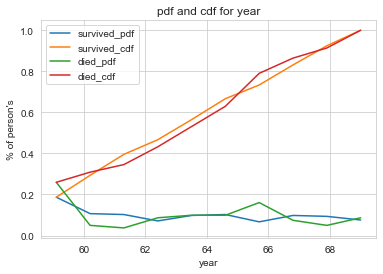

In [45]:
survived=data.loc[data['status']==1]
not_survived=data.loc[data['status']==2]
label = ["survived_pdf", "survived_cdf", "died_pdf", "died_cdf"]
counts , bin_edges= np.histogram(survived['year'] , bins=10 , density= True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.title("pdf and cdf for year")
plt.xlabel("year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(not_survived["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

Observation:
           1]Those who performed operation between year 61 - 65 are more probable to be survived 5 years or longer .

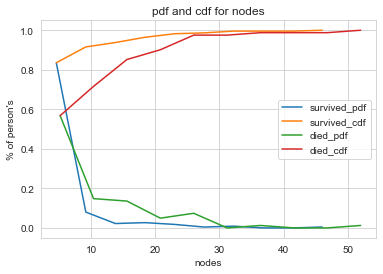

In [44]:
survived=data.loc[data['status']==1]
not_survived=data.loc[data['status']==2]
label = ["survived_pdf", "survived_cdf", "died_pdf", "died_cdf"]
counts , bin_edges= np.histogram(survived['nodes'] , bins=10 , density= True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.title("pdf and cdf for nodes")
plt.xlabel("nodes")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(not_survived["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

Observation:
          1] Patients who have nodes less than 22 are more probable to survive for more than 5 years.

# Mean  and  std-dev

In [62]:
#mean and std deviation for age 
survived=data.loc[data['status']==1]
not_survived=data.loc[data['status']==2]
print("Mean")
print(np.mean(survived['aGe']))
print(np.mean(not_survived['aGe']))
print("standard deviation")
print(np.std(survived['aGe']))
print(np.std(not_survived['aGe']))

Mean
52.01777777777778
53.67901234567901
standard deviation
10.98765547510051
10.10418219303131


Observation:
      1] The mean age of patient who survived is 52.
      2]The mean age of patient who survived is approximately 54.

In [61]:
# mean and standard deviation of nodes 
print("mean")
print(np.mean(survived['nodes']))
print(np.mean(not_survived['nodes']))
print("standard deviation")
print(np.std(survived['nodes']))
print(np.std(not_survived['nodes']))

mean
2.7911111111111113
7.45679012345679
standard deviation
5.857258449412131
9.128776076761632


Observation:
        1]The mean of nodes of patients who have survived is approximately 3.
        2]The mean of nodes of patients who have not survived is approximately 7.

In [63]:
# mean and std deviation of operation of year
print("mean")
print(np.mean(survived['year']))
print(np.mean(not_survived['year']))
print("standard deviation")
print(np.std(survived['year']))
print(np.std(not_survived['year']))

mean
62.86222222222222
62.82716049382716
standard deviation
3.2157452144021956
3.3214236255207883


Observation:
      1] Operation of year doesnt reveal any information.

# 3D Scatter plot

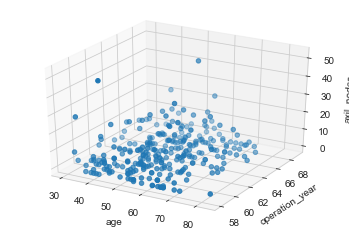

In [80]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

    
xs = data["aGe"]
ys = data["year"]
zs = data["nodes"]    

ax.scatter(xs, ys, zs)

ax.set_xlabel('age')
ax.set_ylabel('operation_year')
ax.set_zlabel('axil_nodes')

plt.show()


Observation:
        1] Doesnt make any sense.

# Box plot and Whiskers

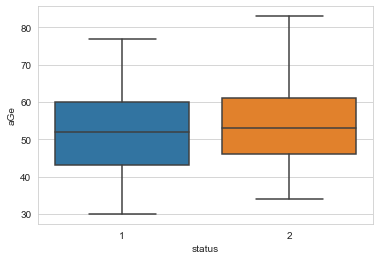

In [109]:
sns.boxplot(x="status",y="aGe", data=data)

plt.show()

Observations:
       1] Patient having age less than 35 year will survive for more than 5 years.
       2] Patient having age more than 78 going to die within 5 years of operation.

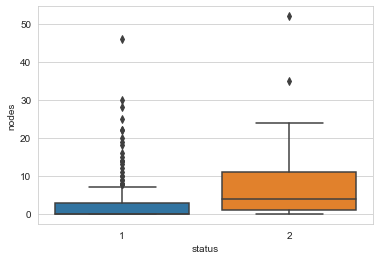

In [90]:
sns.boxplot(x="status",y="nodes", data=data)
plt.show()

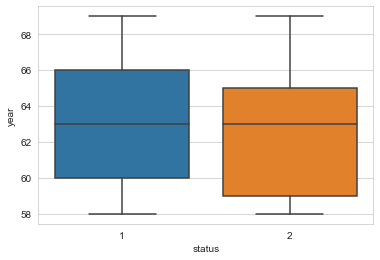

In [91]:
sns.boxplot(x="status",y="year", data=data)
plt.show()

# Violin Plots

C:\Users\kingjames\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


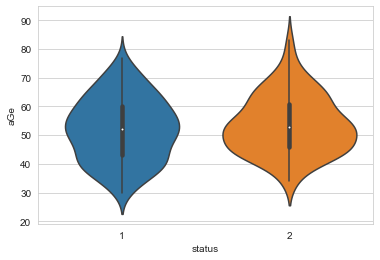

In [95]:
sns.violinplot(x="status", y="aGe" ,data=data)
plt.show()

C:\Users\kingjames\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


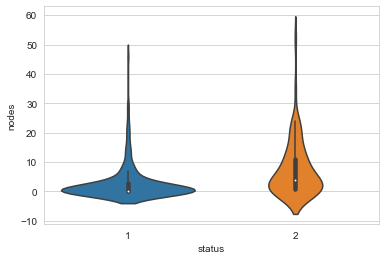

In [96]:
sns.violinplot(x="status", y="nodes" ,data=data)
plt.show()

observations:
    1]50th percentile of survivors have 0 positive nodes, 75th percentie of survivors have less than 3 positive axilary           nodes
    2]25th percentile of dead have 1 positive axilary node, 50th percentile of dead have positive axilary nodes below 4,
    3]75th percentile of dead have positive nodes below 11

C:\Users\kingjames\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


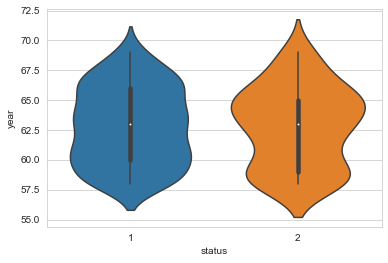

In [97]:
sns.violinplot(x="status", y="year" ,data=data)
plt.show()

# conclusion:

1] There is 73% more chances of patient going to survive for more than 5 years of operation. 
2] if age is less than 34 then patient survived for more than  5 years.
3] if age is greater than 78 then the patient had died within 5 years of operation.
4] age and node are more important feature than year for deciding the status of patient.